In [289]:
#======================================================
# Simular algumas espécies de predador e presa
# para descobrir iterações entre elas.
#
# Será que pode existir dois predadores que se ajudam?
# Ou presas que sobrevivem em extrema dificuldade?
#======================================================

In [290]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [298]:
def dSdt(t, S, params): #competitive predators
    [a, b, c, d, e, f] = params
    x, y, z = S
    
    return [x*(1 - x) - x*y - x*z, 
            a*x*y - c*y - d*y*z,
           b*x*z - e*z - f*y*z]

def dS2dt(t, S, params):
    [a, b, c, d, e, f] = params
    x, y, z = S
    
    return [x*(1 - x) - x*y, 
            a*x*y - b*y - y*z,
           c*y*z - d*z]

def initialData(N):
    u = np.zeros(N)
    v = np.zeros(N)
    w = np.zeros(N)
    for i in range(N):
        u[i] = np.random.random_sample()
        v[i] = np.random.random_sample()
        w[i] = np.random.random_sample()
    return u, v, w

In [311]:
N = 10
S0 = []
for i in range(N):
    prey, predator1, predator2 = initialData(N)
    S0.append((prey[i], predator1[i], predator2[i]))

params = [2, 1, 4, 1, 1, 1]

T = np.linspace(0, 40, 500)
solutions = []
prey_sol = []
predator1_sol = []
predator2_sol = []
for i in range(N):
    solutions.append(odeint(dS2dt, y0=S0[i], t=T, tfirst=True, args=(params,)))
    prey_sol.append(solutions[i].T[0])
    predator1_sol.append(solutions[i].T[1])
    predator2_sol.append(solutions[i].T[2])


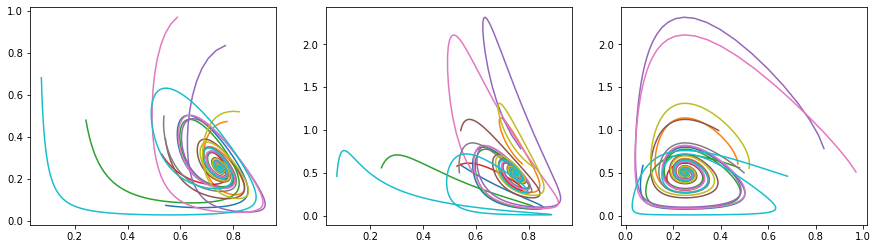

In [312]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

for i in range(N):
    ax = axes[0]
    ax.plot(prey_sol[i], predator1_sol[i])
    ax = axes[1]
    ax.plot(prey_sol[i], predator2_sol[i])
    ax = axes[2]
    ax.plot(predator1_sol[i], predator2_sol[i])

plt.show()